# Assignment 1: Supervised Learning [ __ / 100 marks]

<img src="https://miro.medium.com/max/700/1*uo6VfVH87jRjMZWVdwq3Vw.png"/>

In this assignment we will be comparing the fits of the $L_2$ (OLS) and $L_1$ (LAD) cost functions on the famous iris dataset. Take a look at L1_C.ipynb if you get stuck (you can find this on OWL --> Lessons --> Week 1: "Supervised Learning, Regression"). Note: for brevity, I will write $L_2$ as L2 and $L_1$ as L1.

#### Before you start...

Recall the L1 loss function:

$$L_1(\theta) = \sum_{i=1}^{n} \lvert {y_i-\hat{y_i}} \rvert$$

Also recall the L2 loss function:

$$L_2(\theta) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^2$$

#### Ok, let's start...

In [1]:
# imports
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.optimize as so
from IPython.display import display
%matplotlib inline

### Question 1.1 [ _ /4 marks]

Download the file `iris.csv` (from the A1 page) into the same folder as this notebook. Using pandas, read this csv file into a DataFrame. Next, plot a scatter plot using the "petal.width" column as your independent variable and "sepal.length" as your dependent variable. Label the axes. 

Text(0, 0.5, 'sepal.length')

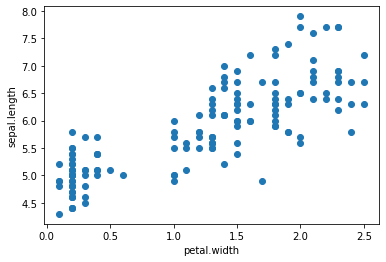

In [2]:
# read the csv in with pandas [ /1 mark]
# ****** your code here ******
df = pd.read_csv('iris.csv')
# plot a scatter plot with labels [ /3 marks]
# ****** your code here ******
plt.scatter(df["petal.width"], df["sepal.length"])
plt.xlabel("petal.width")
plt.ylabel("sepal.length")


### Question 1.2 [ _/4 marks]

For a linear model we obtain predictions using $ \mathbf{\hat{y}} = \mathbf{X} \mathbf{b} $, where $\mathbf{X}$ has a column of ones and a column of inputs $x_i$, and $\mathbf{b}$ contains parameters $b_0$ and $b_1$. 

\begin{equation}
\begin{bmatrix}
\hat{y_0}\\
\hat{y_1}\\
.. \\
\hat{y_n}
\end{bmatrix}
= 
\begin{bmatrix}
1 & x_0\\
1 & x_1\\
.. & .. \\
1 & x_n
\end{bmatrix}
\begin{bmatrix}
b_0\\
b_1\\
\end{bmatrix}
\end{equation}

Write a function called `linearModelPredict` which returns predictions `yp` (a 1d-array) given arguments X (a 2d-array) and b (a 1d-array). Test this function with the values provided (i.e. print or display the result of the function call). 

In [3]:
# write your function here [ /2 marks]
def linearModelPredict(b,X):
    yp = np.dot(X, b)
    return yp

# use these provided values
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])

# test your function here [ /2 marks]
# ****** your code here ******
test_val = linearModelPredict(b,X)
print(test_val)

[ 0.1 -0.2  0.7]


### Question 1.3 [ _/8 marks]

Write a function called `linearModelLossRSS` which returns a 2-tuple containing the L2 loss value (rss) and the gradient (provided) given arguments b (1d-array), X (2d-array), and y (observed output, a 1d-array). Test linearModelLossRSS with the values provided for X, b, and y by calling said function with these values and displaying or printing the resulting output. 

In [4]:
# write your function here [ /6 marks]
def linearModelLossRSS(b,X,y):
    yp = linearModelPredict(b,X)
    res = y - yp
    rss = sum(res**2)
    gradient= -2*np.dot(res,X)
    return (rss, gradient)

# use these provided values 
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

# test your function here [ /2 marks]
# ****** your code here ******
test_val = linearModelLossRSS(b, X, y)
print(test_val)

(2.06, array([-3.6, -4. ]))


### Question 1.4 [ _/8 marks]

Write a function called `linearModelLossLAD`: it returns a 2-tuple containing the L1 loss value (sad) and the gradient (provided) given arguments b (1d-array), X (2d-array), and y (observed output, a 1d-array). Test linearModelLossLAD with the values provided for X, b, and y by calling the function with these values and displaying or printing the resulting output.

In [5]:
# write your function here [ /6 marks]
def linearModelLossLAD(b,X,y):
    yp = linearModelPredict(b,X)
    res = y - yp
    sad = sum(abs(res))
    grad = - (np.dot(np.sign(res),X))
    return (sad,grad)

# use these provided values
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

#test your function here [ /2 marks]
# ****** your code here ******
test_val = linearModelLossLAD(b, X, y)
print(test_val)

(2.0, array([-1., -1.]))


### Question 1.5 [ _/14 marks]

Write a function called `linearModelFit` which returns a 2-tuple containing a prediction for b (`bpr`, a 1d-array) and the $R^2$ value (`R2`) of your fit, given arguments X (2d-array), y (1d-array), and lossf (the loss function for your fit). For now, set lossf as the L2 loss function that you defined previously. Call linearModelFit with the provided values and print the result.

In [6]:
# write your function here [ /12 marks]
def linearModelFit(X,y,lossf = linearModelLossRSS):
    nrows,ncols = X.shape
    bpr=np.zeros((ncols,1))
    
    RES = so.minimize(lossf, bpr, args=(X,y), jac=True)
    bpr= RES.x
    
    res = y - np.mean(y)
    TSS = sum(res**2)
    RSS,deriv = linearModelLossRSS(bpr, X, y)
    R2 = 1-(RSS/TSS)
    return (bpr,R2)

# use these provided values
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

# test your function here [ /2 marks]
# ****** your code here ******
test_val = linearModelFit(X, y)
print(test_val)         

(array([0.6, 0.6]), 0.75)


### Question 2.1 [ _/13 marks]

Let's fit our L1 and L2 models to the iris data from Question 1.1 and then plot our prediction lines. We'll start with L2: Fit the data from 1.1 using `linearModelFit` (with `lossf = linearModelLossRSS`) to get an estimate for b (name it `bpr`). Use bpr to generate a prediction line for new data `X_new` (provided). In a single figure, plot the data points with the fit line; label the axes; finally, display or print the $R^2$ value (or alternatively, annotate the plot with the $R^2$ value).

[0.1        0.36666667 0.63333333 0.9        1.16666667 1.43333333
 1.7        1.96666667 2.23333333 2.5       ]
[[1.         0.1       ]
 [1.         0.36666667]
 [1.         0.63333333]
 [1.         0.9       ]
 [1.         1.16666667]
 [1.         1.43333333]
 [1.         1.7       ]
 [1.         1.96666667]
 [1.         2.23333333]
 [1.         2.5       ]]


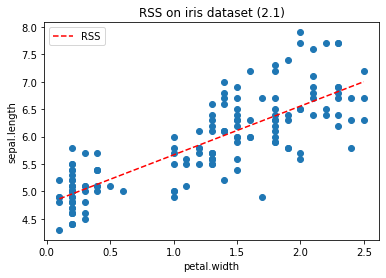

The R2 value is: 0.6690276860464135


In [7]:
# put data from 1.1 into X,y [ /4 marks]
y = df.loc[:,"sepal.length"].values
x = df.loc[:,"petal.width"].values
X = np.transpose(np.concatenate([[np.ones(len(df))], [x]]))

# fit this data with linearModelFit [ /2 marks]
bpr, R2 =  linearModelFit(X, y)

# use this data for your prediction plot
x_grid = np.linspace(x.min(), x.max(), 10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

print(x_grid)
print(Xnew)
# get your predicted y using Xnew [ /2 marks]
yp = linearModelPredict(bpr, Xnew)

# plot the iris data with your prediction line, print R2 [ /5 marks]
# ****** your code here ******
plt.scatter(df["petal.width"], df["sepal.length"])
plt.plot(Xnew[:,1], yp, color='red', linestyle='--')
plt.xlabel("petal.width")
plt.ylabel("sepal.length")
plt.legend(["RSS"])
plt.title("RSS on iris dataset (2.1)")
plt.show()

print("The R2 value is: " + str(R2))


### Question 2.2 [ _/15 marks]

Now consider L1 as your loss function. Fit the data from 1.1 using `linearModelFit` with `lossf = linearModelLossLAD` to get an estimate for b (name it `bpr`). Use bpr to generate a prediction line for new data `X_new` (provided). In a single figure, plot the data points and fit line; also label the plot with axes; finally, print the $R^2$ value (or annotate the plot). Which of the two fit lines appears to best match the data? Write your answer below.

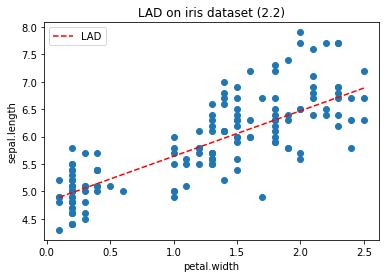

The R2 value is: 0.663857934044439
Which of the two fit lines appears to best match the data?
The RSS line has greater R-values than the LAD line, hence we can say that the RSS line best match the data.


In [8]:
# put data from 1.1 into X,y [ /4 marks]
y = df.loc[:,"sepal.length"].values
x = df.loc[:,"petal.width"].values
X = np.transpose(np.concatenate([[np.ones(len(df))], [x]]))

# fit the data with linearModelFit [ /2 marks]
bpr, R2 = linearModelFit(X, y, linearModelLossLAD)

# use this data for your prediction plot
x_grid = np.linspace(x.min(), x.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# get your predicted y ('yp') using Xnew [ /2 marks]
yp = linearModelPredict(bpr, Xnew)

# plot the iris data with your prediction line, print R2 [ /5 marks]
# ****** your code here ******
plt.scatter(df["petal.width"], df["sepal.length"])
plt.plot(Xnew[:,1], yp, color='red', linestyle='--')
plt.xlabel("petal.width")
plt.ylabel("sepal.length")
plt.legend(["LAD"])
plt.title("LAD on iris dataset (2.2)")
plt.show()
print("The R2 value is: " + str(R2))

#  Which of the two fit lines appears to best match the data? [ /2 marks]
print("Which of the two fit lines appears to best match the data?")
print("The RSS line has greater R-values than the LAD line, hence we can say that the RSS line best match the data.")


### Question 2.3 [ _/20 marks]

Download the file `outliers.csv` (from the A1 page) into the same folder as this notebook. Using pandas, read this file into a DataFrame, then append this to your iris dataset DataFrame. Perform an L1 fit and an L2 fit on this combined DataFrame (iris + outliers). Finally, plot lines of best fit using new x values (i.e. the code is provided for the L2 fit and you can reuse those lines of code for L1). Which of the two fit lines appears to best match the data? Write your answer below. 

The R2 value for L2 is: 0.15124448500184862
The R2 value for L1 is: 0.04863612441309151


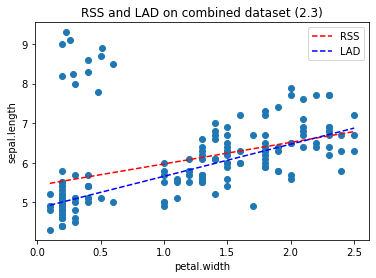

Which of the two fit lines appears to best match the data? [ /2 marks]
Based on the R-values and the distribution of data points, we can say that the RSS fit line best match the data.


In [9]:
# read outliers.csv, append it to original dataframe [ /2 marks]
# ****** your code here ******
df_out = pd.read_csv('outliers.csv')
df_iris = pd.read_csv('iris.csv')

frames = [df_out, df_iris]
df = pd.concat(frames)

# put data (iris + outliers) into variables X,y [ /5 marks]
y = df.loc[:,"sepal.length"].values
x = df.loc[:,"petal.width"].values
X = np.transpose(np.concatenate([[np.ones(len(df))], [x]]))

# fit the data with linearModelFit [ /2 marks]
bpr, R2 = linearModelFit(X, y)

# use new x data for your prediction plot
x_grid = np.linspace(x.min(), x.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# get your predicted y ('yp') using Xnew [ /2 marks]
yp = linearModelPredict(bpr, Xnew)

# plot the iris data with your prediction line, print R2 [ /5 marks]
# ****** your code here ******
plt.scatter(df["petal.width"], df["sepal.length"])
plt.plot(Xnew[:,1], yp, color='red', linestyle='--')
plt.xlabel("petal.width")
plt.ylabel("sepal.length")
print("The R2 value for L2 is: " + str(R2))

# repeat the above process for L1 (i.e. repeat lines 10-17 for L1) [ /2 marks]
# ****** your code here ******

bpr, R2 = linearModelFit(X, y, linearModelLossLAD)
yp = linearModelPredict(bpr, Xnew)
plt.plot(Xnew[:,1], yp, color='blue', linestyle='--')

print("The R2 value for L1 is: " + str(R2))
plt.legend(["RSS", "LAD"])
plt.title("RSS and LAD on combined dataset (2.3)")
plt.show()
#  Which of the two fit lines appears to best match the data? [ /2 marks]
print("Which of the two fit lines appears to best match the data? [ /2 marks]")
print("Based on the R-values and the distribution of data points, we can say that the RSS fit line best match the data.")


### Question 2.4: [ _/14 marks]

Ok, let's put everything together into a single plot. To start, plot the combined DataFrame (iris + outliers). Next, plot prediction lines for L1 and L2 fits on the combined data. Finally, plot prediction lines for L1 and L2 fits on the original (iris) data. Add a legend; also add axis labels. *Based on this plot, does L1 loss or L2 loss appear to be more robust to outliers?*

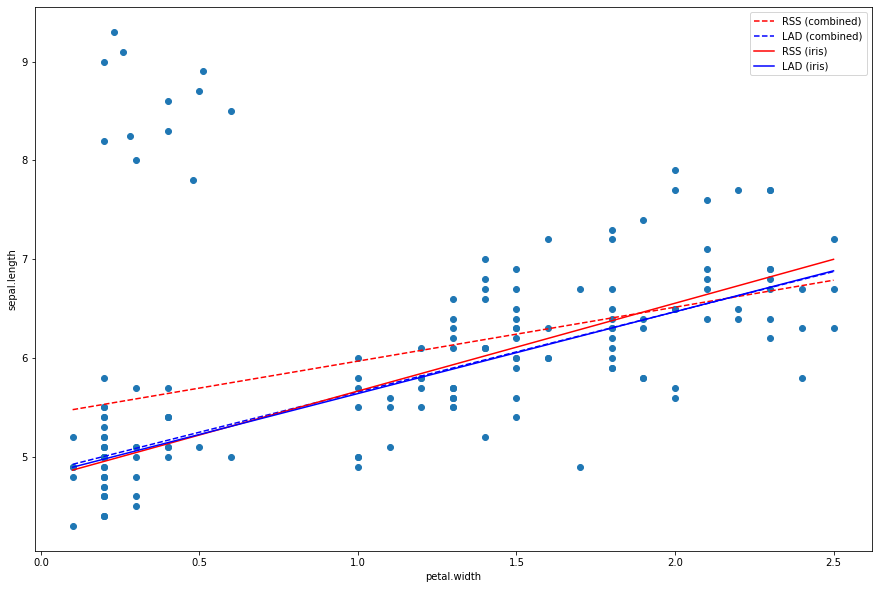

We can observe some outliers appear on the top left of the graph. RSS on the combined dataset perform better fit to outliers and it has a larger R^2 values than L1


In [10]:
# this increases the figure size for added viewability
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# plot the data and fits (L1, L2) for the combined dataset [ /5 marks]
# ****** your code here ******

df_out = pd.read_csv('outliers.csv')
df_iris = pd.read_csv('iris.csv')

# combine two dataset together
frames = [df_out, df_iris]
df = pd.concat(frames)

# put combined data into variables X,y
y = df.loc[:,"sepal.length"].values
x = df.loc[:,"petal.width"].values
X = np.transpose(np.concatenate([[np.ones(len(df))], [x]]))

# use new x data for your prediction plot
x_grid = np.linspace(x.min(), x.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# plot the data
plt.scatter(df["petal.width"], df["sepal.length"])
plt.xlabel("petal.width")
plt.ylabel("sepal.length")

# generate  predicted y ('yp') using Xnew with RSS
bpr, R2 = linearModelFit(X, y, linearModelLossRSS)
yp = linearModelPredict(bpr, Xnew)
plt.plot(Xnew[:,1], yp, color='red', linestyle='--')

# generate  predicted y ('yp') using Xnew with LAD
bpr, R2 = linearModelFit(X, y, linearModelLossLAD)
yp = linearModelPredict(bpr, Xnew)
plt.plot(Xnew[:,1], yp, color='blue', linestyle='--')

# plot fits (L1, L2) for the original iris dataset [ /5 marks], include legend/labels [ /2 marks]
# ****** your code here ******
df = pd.read_csv('iris.csv')

y = df.loc[:,"sepal.length"].values
x = df.loc[:,"petal.width"].values
X = np.transpose(np.concatenate([[np.ones(len(df))], [x]]))

# use this data for your prediction plot
x_grid = np.linspace(x.min(), x.max(), 10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# fit this data with linearModelFit (RSS)
bpr, R2 = linearModelFit(X, y)

# get your predicted y using Xnew
yp = linearModelPredict(bpr, Xnew)

plt.plot(Xnew[:,1], yp, color='red', linestyle='-')

# fit this data with linearModelFit(LAD)
bpr, R2 = linearModelFit(X, y, linearModelLossLAD)

# get your predicted y using Xnew
yp = linearModelPredict(bpr, Xnew)

plt.plot(Xnew[:,1], yp, color='blue', linestyle='-')

plt.legend(["RSS (combined)", "LAD (combined)", "RSS (iris)", "LAD (iris)"])
plt.show()

# Based on this plot, does L1 loss or L2 loss appear to be more robust to outliers? [ /2 marks]
print("We can observe some outliers appear on the top left of the graph. RSS on the combined dataset perform better fit to outliers and it has a larger R^2 values than L1")
